>**Authour : Sharath P S**
>> **Dataset used**
>>>Car-Evaluvation : https://archive.ics.uci.edu/ml/machine-learning-databases/car/ 

### **0. Business Requirement**
> **Purpose**

>>The evaluation dataset will be used to make a convenient decision based on multiple factors that will be affecting a successful purchase of a car. The Buyers decision will be dependent on multiple factors such as maintenance, price, safety, comfort, etc… 

>>Model basically revolves around decision making and identifying contributing factors to decide between a good acceptable car from the unaccepted values from the target value.

> **Target Customers**

>>In this analysis, we will process the data, explore the variable relationship between the attributes and building a model with more feasible parameter to make the right decision with the given params.

> **Data Attributes**
>>Dataset is used to classify the car acceptability into classes: unacceptable, acceptable, good and very good.
>>Predict and display the class label of a car with following attributes : buying, main, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med].
>>High level understanding of the given data for business analysis
>>Buying (vhigh, high, med, low)
>>Maintenance (vhigh, high, med, low)
>>Doors (2, 3, 4)
>>Persons (2, 4, more)
>>Luggage boot (small, med, big)
>>Safety (low, med, high)
>>Output Variable:
>>Class (unacc, acc, good, vgood)
>>Model will be built using these attributes to analyse the accuracy of Class factor from customers.
 
>**Methodology**
>>Data Preprocessing – As dataset is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/car  the dataset has to be preprocessed for missing values and NaN values as we will be dealing with the categorical data to have a better accuracy of analysis. Along with handling above mentioned scenarios categorical entries should be converted to numerical values as most of ML models works more accurately with numerical values and few feature engineering techniques has to be applied Ex: OneHotEncoding, Label Encoding, etc…

>**Data Exploration**
>>Visual exploration of the data is being pre-processed. The exploration could be Univariate, Bi-variate and Multivariate. Major conclusions could be drawn using these explorations.
 
>**Train-Test data split**
>>Pre=process dataset has to be divided into train and test data in-order to build the model. The splitting our dataset could be decided based on the objective that we are aiming to achieve. Be mindful enough not to attain underfitting or overfitting model.
 
>**Building model**
>>Based on the outcome that the target customer is expecting, a efficient model has be selected and implemented. It could be classification model, Decision tree, KNN, Regression model, etc…
 
>**Risk Involved**
>>If an outdated data is provided in the dataset, which out result in invalid prediction and which out potentially lead to customer dissatisfaction. 
>>Model attaining overfitting scenario, training data fit the model so perfectly that there will not be any scenario for the algorithm to learn from any. Which would be failure while testing the real time data.
>>Having to revisit the model post production deployment to tweak the model based on customer’s updated interest or requirement in a car.
 
>**Result**
>>Comparison between the models that are built using pre-processed data and the model with high accuracy would be considered for any future decision making objective.


# **1.   Import Libraries/Dataset**

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

In [ ]:
colnames = ["buying","maint","doors","persons","lug_boot","safety","Target"]
raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None,names=colnames)



# **2.   Data Visualization and Exploration**



In [ ]:
raw_data.head(5)

,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
raw_data.shape

(1728, 7)

Check for the Null/Na/Missing values

In [ ]:
100*(raw_data.isna().sum()/raw_data.shape[0])

buying      0.0
maint       0.0
doors       0.0
persons     0.0
lug_boot    0.0
safety      0.0
Target      0.0
dtype: float64

Understand the data set values/types

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Check the descriptive statistics of the raw data to get abasic understnading of data (This might require data type conversions and other transformations, which we will address later and again will check these statistics)

In [ ]:
raw_data.describe()

,buying,maint,doors,persons,lug_boot,safety,Target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1210


## **2.1 Visualize the Univariate distribution of data**

No handles with labels found to put in legend.


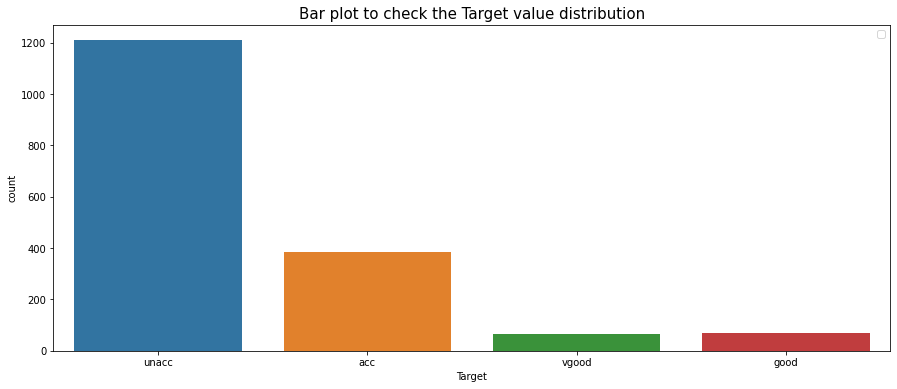

In [ ]:
size = raw_data['Target'].value_counts()
plt.rcParams['figure.figsize'] = (15, 6)
sb.countplot(raw_data['Target'])
plt.title('Bar plot to check the Target value distribution', fontsize = 15)
plt.legend()
plt.show()

Visualize the other features' distribution

Text(0.5, 1.0, 'Safety variable distribution')

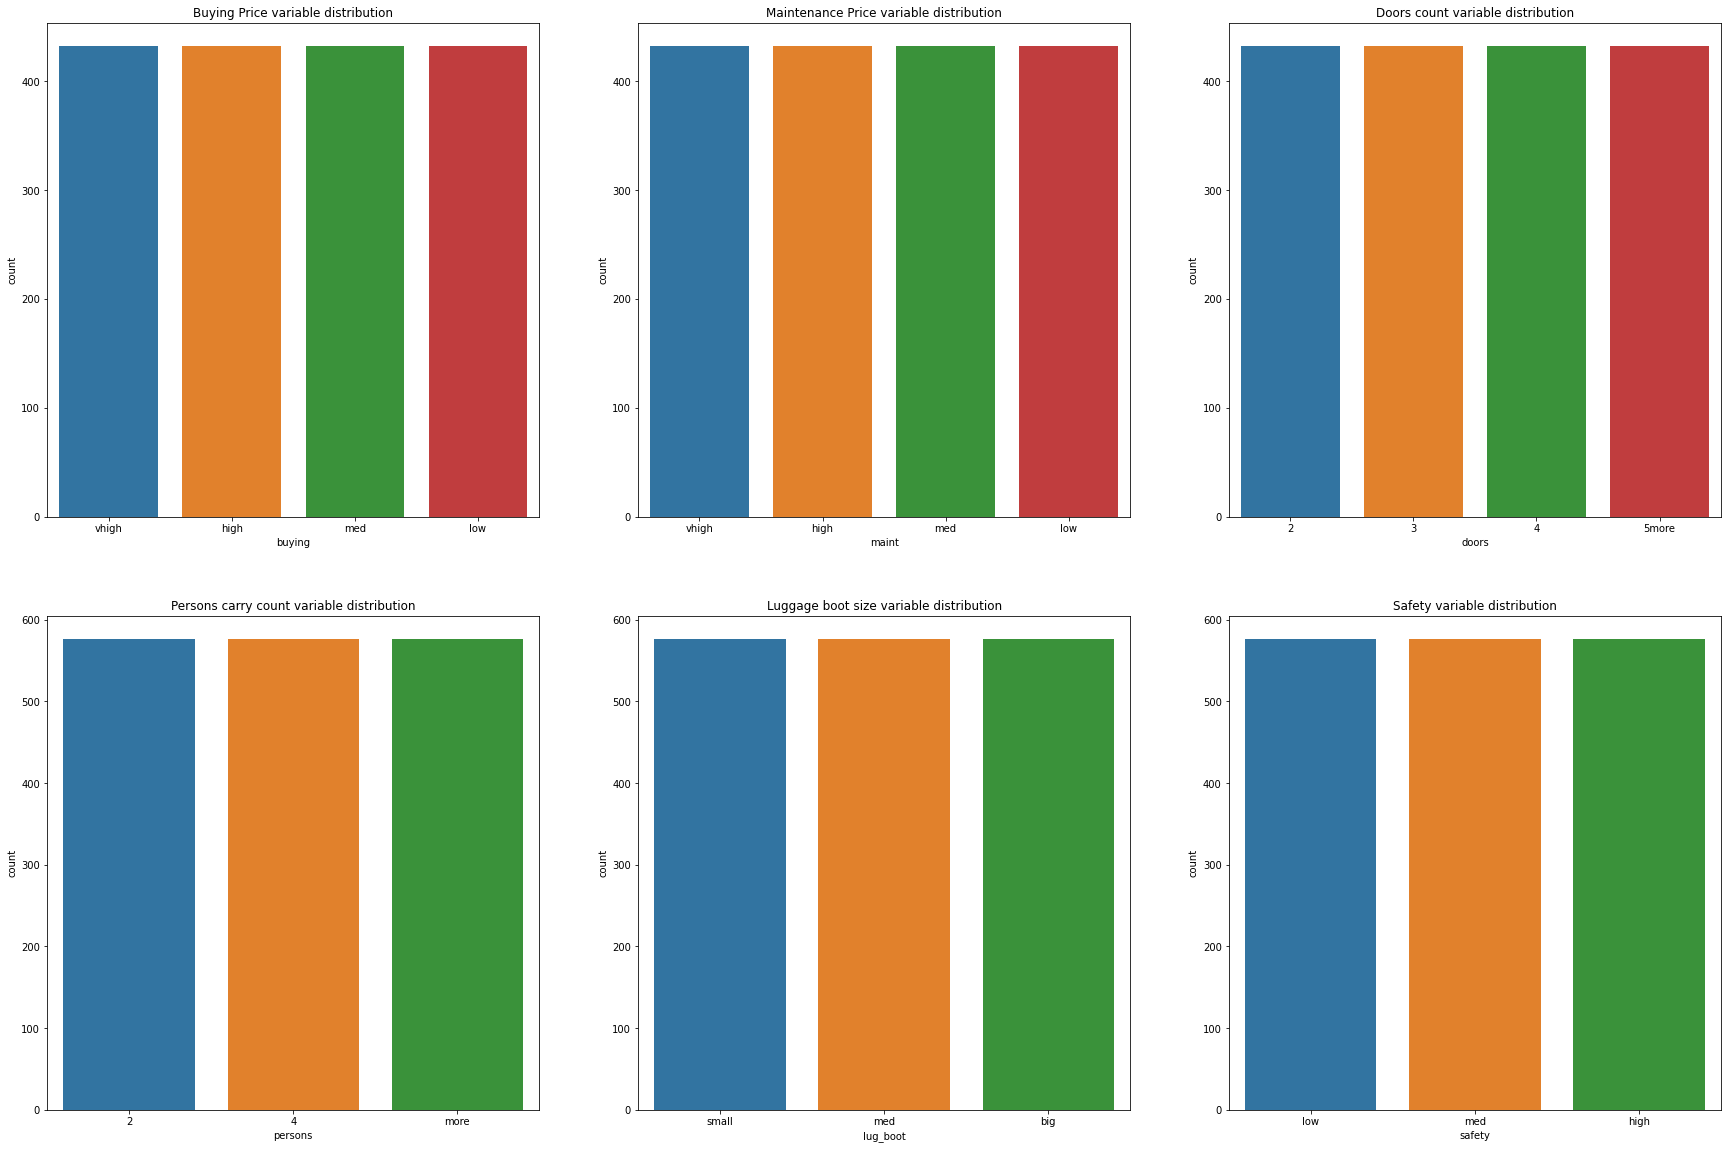

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
fig, ax = plt.subplots(2, 3)

sb.countplot(raw_data['buying'],ax=ax[0,0]).set_title("Buying Price variable distribution")
sb.countplot(raw_data['maint'],ax=ax[0,1]).set_title("Maintenance Price variable distribution")
sb.countplot(raw_data['doors'],ax=ax[0,2]).set_title("Doors count variable distribution")
sb.countplot(raw_data['persons'],ax=ax[1,0]).set_title("Persons carry count variable distribution")
sb.countplot(raw_data['lug_boot'],ax=ax[1,1]).set_title("Luggage boot size variable distribution")
sb.countplot(raw_data['safety'],ax=ax[1,2]).set_title("Safety variable distribution")

## **2.2 Visualize the Bivariate analysis**

Check the distribution of Dependent feature distribution with in each Independent features.

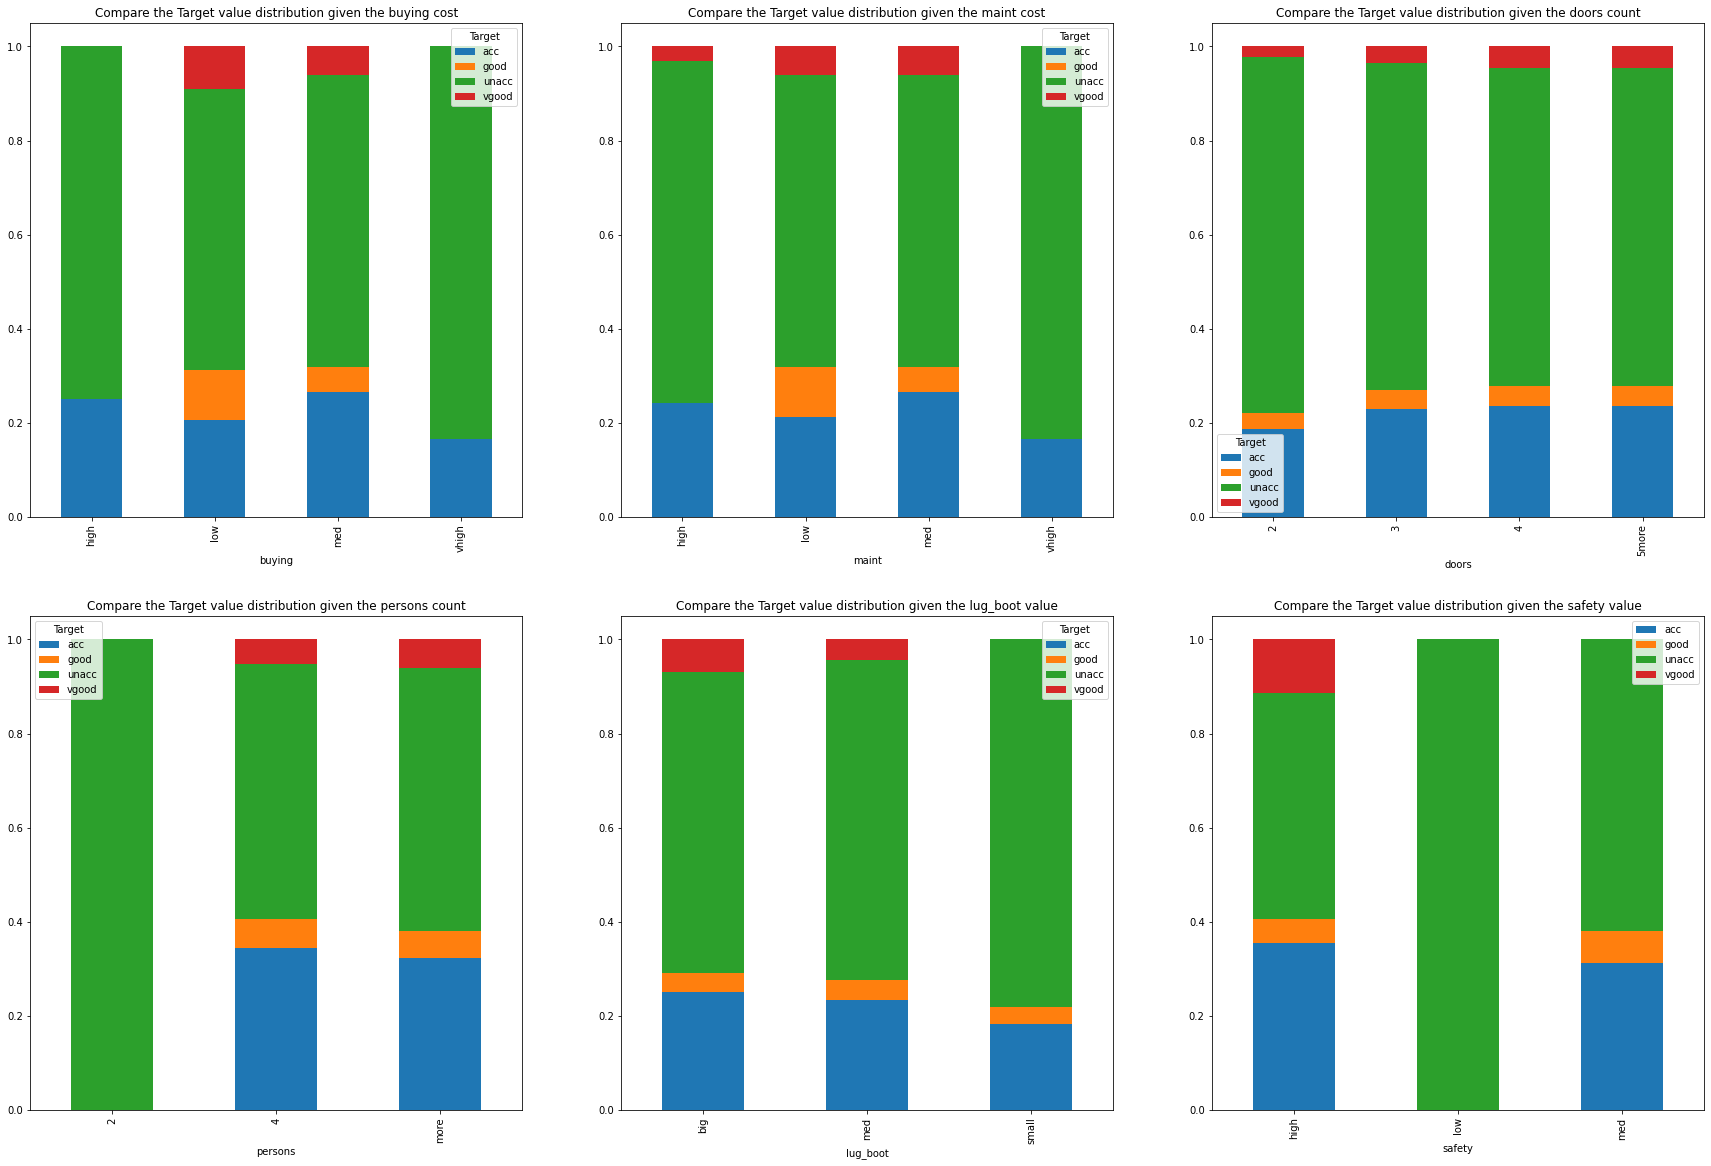

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
fig, ax = plt.subplots(2, 3)

mc = pd.crosstab(raw_data['buying'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, ax=ax[0,0], title='Compare the Target value distribution given the buying cost')

mc = pd.crosstab(raw_data['maint'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, ax=ax[0,1], title='Compare the Target value distribution given the maint cost')

mc = pd.crosstab(raw_data['doors'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,ax=ax[0,2], title='Compare the Target value distribution given the doors count')

mc = pd.crosstab(raw_data['persons'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,ax=ax[1,0], title='Compare the Target value distribution given the persons count' )

mc = pd.crosstab(raw_data['lug_boot'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,ax=ax[1,1], title='Compare the Target value distribution given the lug_boot value' )

mc = pd.crosstab(raw_data['safety'], raw_data['Target'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,ax=ax[1,2], title='Compare the Target value distribution given the safety value')

plt.legend()
plt.show()

## **2.3 EDA conclusion**



*   All the dependent features has uniformly distributed values.
*   Given dataset *target* class is having **imbalance distribution** with below % of values for each class.

      **unacc:**    70.023148%

      **acc:**      22.222222%

      **good:**      3.993056%

      **vgood:**     3.761574%

*   As the Saftey of the car increases the acceptability also increases, if the car is having low saftey then there is a high chance of getting **unaccepted** 

* As the car cost and maintenance cost goes high there is a increasing chance of not getting **Good** or **Very Good** acceptability

* People are looking for the cars with more **capacity in terms of persons to carry**. Small cars having capacity of carrying 2 people are mostly not accepted.

* We dont see any biased selection when it comes to number of doors in the car. People looks to be equally likely open for any **number of doors**

* Our Target/Dependent feature has a 4 categorical values. Sowe need to build a **Classification Model** toindentify the right value for the Dependent Variable.



## **2.4 Data Quality analysis**
### **2.4.1 Outlier analysis**

From the below charts we can say that there are **no outliers** are present in the dataset and features are **uniformly** distributed.

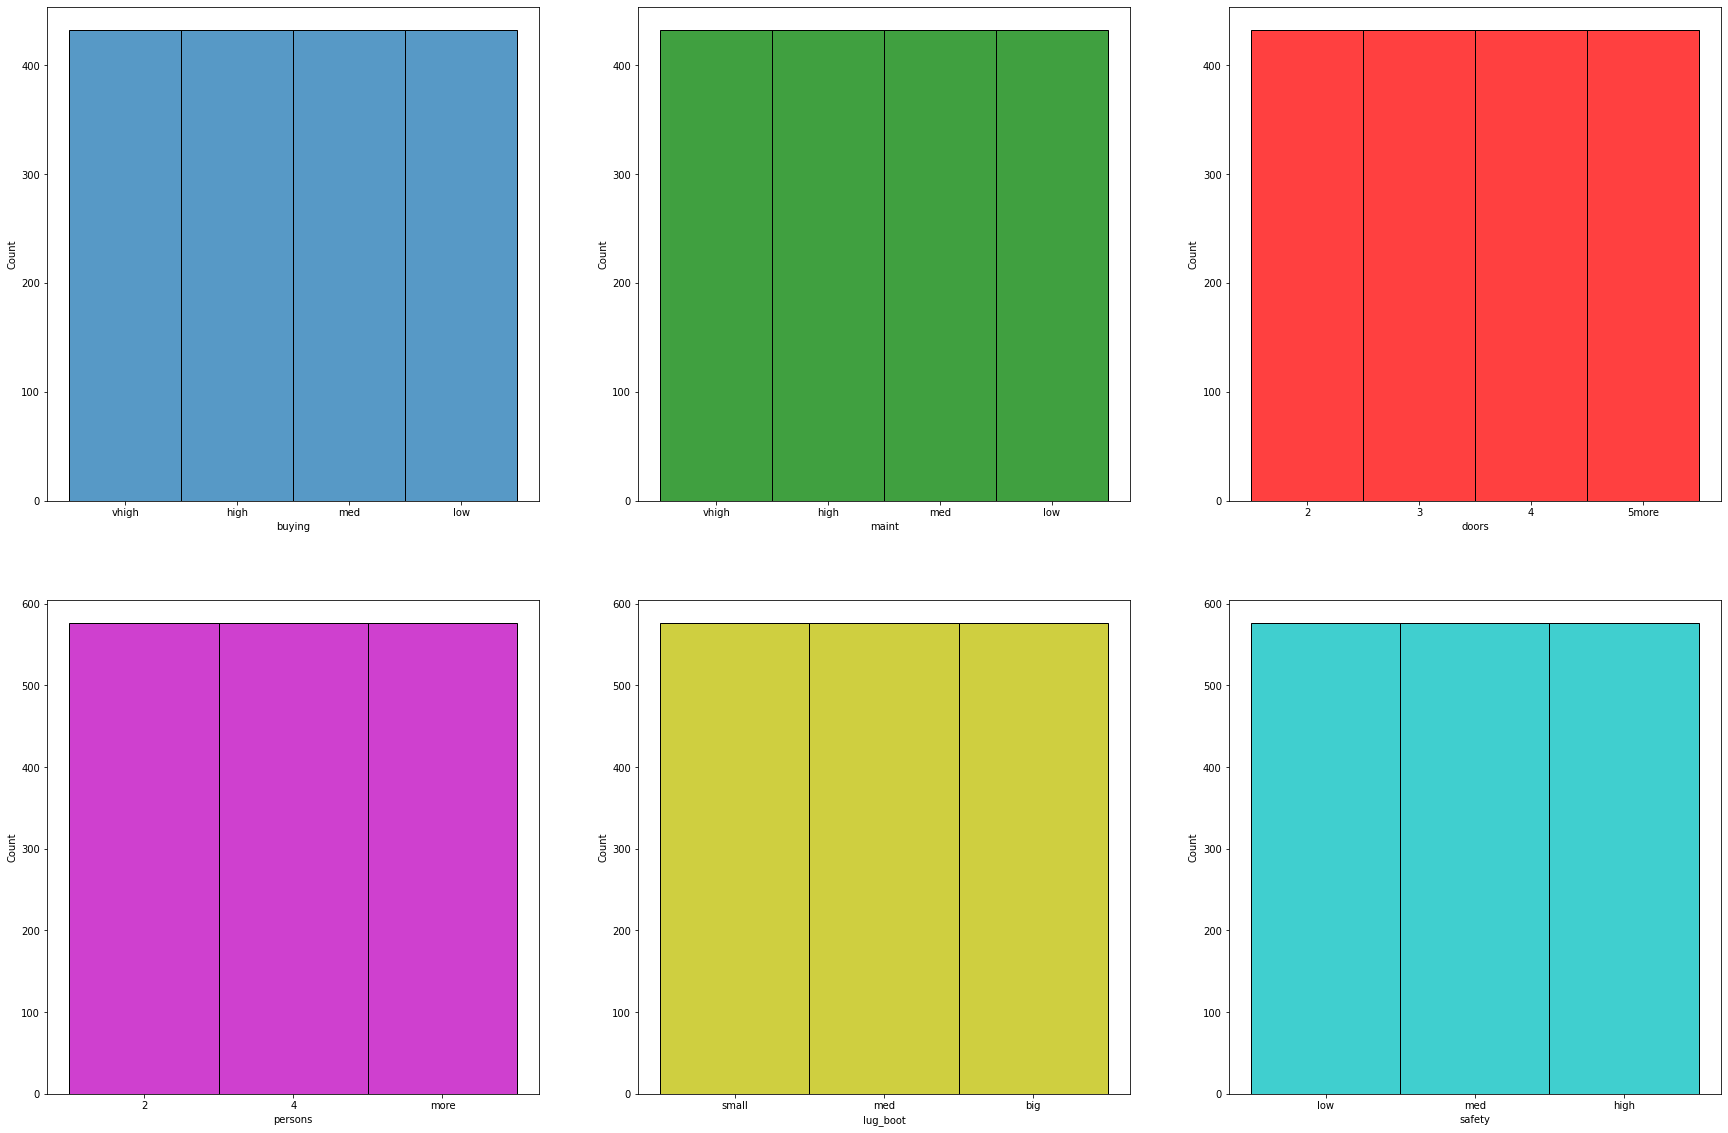

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
fig, ax = plt.subplots(2, 3)
sb.histplot(raw_data['buying'], ax=ax[0,0])
sb.histplot(raw_data['maint'], ax=ax[0,1], color='g')
sb.histplot(raw_data['doors'], ax=ax[0,2], color='r')
sb.histplot(raw_data['persons'], ax=ax[1,0],color='m')
sb.histplot(raw_data['lug_boot'], ax=ax[1,1],color='y')
sb.histplot(raw_data['safety'], ax=ax[1,2],color='c')


# **3. Data Pre-processing and cleaning**

* Convert the categorical values from each features into numerical **ordinal** values. For the i will be going with simple ***replace*** method rather than using OrdinalEncoder.

* Given dataset is not having any missing values (we have already checked this above) so there is no missing value treatment required.

* Most of the features has categorical/ordinal values we do not required any Standardization. We may required to create dummy features for some of the categorical features. We will decide on this later once we have base model and then decide wether making dummy will improve the model performance.

* **Correlational Analysis:** I have plotted the correlational plot. We can see Safety and Capacity to carry # persons have comparatively *higher correlation* with the dependent feature which we have inferred from *EDA* step also.

    We do not see any correlation between the independent features.

In [ ]:
raw_data['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
raw_data['buying'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
raw_data['Target'].replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
raw_data['lug_boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
raw_data['maint'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
raw_data['doors'].replace('5more', 5, inplace = True)
raw_data['persons'].replace('more', 5, inplace = True)
raw_data['persons'] = pd.to_numeric(raw_data['persons'])
raw_data['doors'] = pd.to_numeric(raw_data['doors'])

In [ ]:
raw_data.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
Target      int64
dtype: object

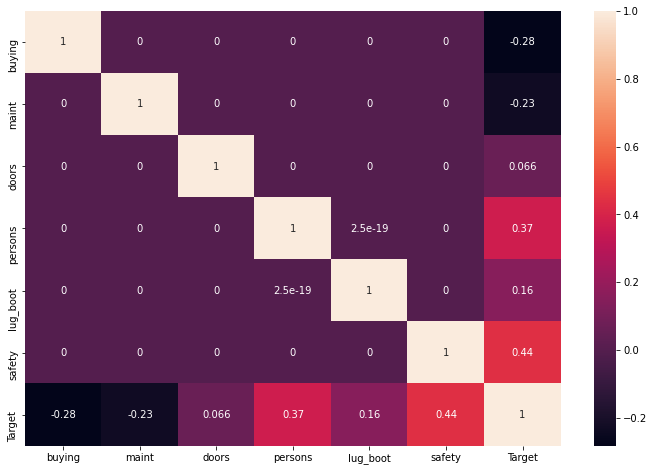

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
sb.heatmap(raw_data.corr(), annot=True)
plt.show()

In [ ]:
raw_data.describe()

,buying,maint,doors,persons,lug_boot,safety,Target
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,3.500000,3.666667,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.740700
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,2.750000,2.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,3.500000,4.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,4.250000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


# **4. Data Preparation**

  ## **4.1 Troubleshooting class imbalance**
  Since the target/Dependent feature class is highly imbalenced using **RandomOverSampler** let us over-sample the minority class(es) by picking samples at random with replacement.

In [ ]:
#raw_data.drop('persons', inplace=True, axis=1)

In [ ]:
x = raw_data.iloc[:,:len(raw_data.columns)-1]
y = raw_data.Target
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [ ]:
ros = RandomOverSampler(random_state=100)
x, y = ros.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (3630, 6)
Shape of y_train:  (3630,)
shape of x_test:  (1210, 6)
shape of y_test:  (1210,)


In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)


[[   0 1210]
 [   1 1210]
 [   2 1210]
 [   3 1210]]


# **5. Model Building**

## **5.1 Regression models**

In [ ]:
clf = LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_LR=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.8840220385674931
Testing Accuracy:  0.8983471074380165
[[269  28  10   3]
 [ 41 228  12  11]
 [  0   7 297   0]
 [  0  11   0 293]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       310
           1       0.83      0.78      0.81       292
           2       0.93      0.98      0.95       304
           3       0.95      0.96      0.96       304

    accuracy                           0.90      1210
   macro avg       0.90      0.90      0.90      1210
weighted avg       0.90      0.90      0.90      1210



### **5.1.1 Multicollinearity?**

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = raw_data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,buying,2.606473
1,maint,2.606473
2,doors,6.735930
3,persons,6.442677
4,lug_boot,2.356007
5,safety,2.356007


In [ ]:
X.drop('persons', inplace=True, axis=1)
calc_vif(X)

,variables,VIF
0,buying,2.510345
1,maint,2.510345
2,doors,4.717241
3,lug_boot,2.284483
4,safety,2.284483


In [ ]:
raw_data_VIF = raw_data.drop('persons', inplace=False, axis=1)

In [ ]:
x_vif = raw_data_VIF.iloc[:,:len(raw_data_VIF.columns)-1]
y_vif = raw_data_VIF.Target
x_vif, y_vif = ros.fit_resample(x_vif, y_vif)
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, test_size = 0.25, random_state = 100)

In [ ]:
x_vif.shape

(4840, 5)

In [ ]:
clf = LogisticRegression(random_state = 0)
clf.fit(x_train_vif, y_train_vif)
y_pred = clf.predict(x_test_vif)
f1_LR=f1_score(y_test_vif,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train_vif, y_train_vif))
print("Testing Accuracy: ", clf.score(x_test_vif, y_test_vif))
cm = confusion_matrix(y_test_vif, y_pred)
print(cm)
print(classification_report(y_test_vif,y_pred)) 

Training Accuracy:  0.8286501377410468
Testing Accuracy:  0.828099173553719
[[215  61  22  12]
 [ 68 200  13  11]
 [  0   0 298   6]
 [  0  11   4 289]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       310
           1       0.74      0.68      0.71       292
           2       0.88      0.98      0.93       304
           3       0.91      0.95      0.93       304

    accuracy                           0.83      1210
   macro avg       0.82      0.83      0.82      1210
weighted avg       0.82      0.83      0.82      1210



### **5.1.2 Conclusion on Regression Model**

We observed high collinearity with **persons** and **doors** attribute. So we tried second model after removing "persons" feature from our data set. But after removing this feature model **bias** got increased but at the same time **vairance** got better as we can see both test and train accuracy are almost same. This shows that our model is stable in its prediction with the new data.

## **5.2 K-Nearest Neighbors**

### **5.2.1 KNN Hyperparamenter tunning**

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,6, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN_1=grid_search_KNN.fit(x_train, y_train)
y_pred_KNN1 =KNN_1.predict(x_test)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Score - KNN: 0.9611570247933884


### **5.2.2 KNN final model**
Evaluation of the model built using best values for the hyperparameter

In [ ]:

clf = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2,weights= 'distance', leaf_size= 20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.9727272727272728
[[284  18   8   0]
 [  0 285   5   2]
 [  0   0 304   0]
 [  0   0   0 304]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       310
           1       0.94      0.98      0.96       292
           2       0.96      1.00      0.98       304
           3       0.99      1.00      1.00       304

    accuracy                           0.97      1210
   macro avg       0.97      0.97      0.97      1210
weighted avg       0.97      0.97      0.97      1210



## **5.3 Decision tree classifier**

### **5.3.1 Hyperparameter tunning**

In [ ]:
params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'splitter':['best', 'random'], 'min_samples_split':np.arange(10, 50)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed:   24.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='depr...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': a

In [ ]:
#from sklearn.tree import export_graphviz
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### **5.3.2 Final Decision tree model**

In [ ]:
clf = grid_search_cv.best_estimator_
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_DT=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9975206611570248
Testing Accuracy:  0.9933884297520661
[[303   7   0   0]
 [  1 291   0   0]
 [  0   0 304   0]
 [  0   0   0 304]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       310
           1       0.98      1.00      0.99       292
           2       1.00      1.00      1.00       304
           3       1.00      1.00      1.00       304

    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210



## **5.4 Random Forest model**

### **5.4.1 Hyper paramenter tunning**

In [ ]:
param_grid = { 
    'n_estimators': [50, 100 ,150, 200 ],
    'criterion':['gini','entropy'],
    'min_samples_split':[10,30,80,100],
    'min_samples_leaf':[10,25,50],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [ ]:
#Trying Random forest classifier
clf = CV_rfc.best_estimator_
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_RF=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9809917355371901
Testing Accuracy:  0.9752066115702479
[[297  12   1   0]
 [  0 275  15   2]
 [  0   0 304   0]
 [  0   0   0 304]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       310
           1       0.96      0.94      0.95       292
           2       0.95      1.00      0.97       304
           3       0.99      1.00      1.00       304

    accuracy                           0.98      1210
   macro avg       0.98      0.97      0.97      1210
weighted avg       0.98      0.98      0.98      1210



## **5.5 Naive Bayes**

Naive Bayes classifier for categorical features.  


The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.

In [ ]:
clf = CategoricalNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_NB=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.8644628099173554
Testing Accuracy:  0.8826446280991735
[[258  49   3   0]
 [  0 232  43  17]
 [  0   0 274  30]
 [  0   0   0 304]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       310
           1       0.83      0.79      0.81       292
           2       0.86      0.90      0.88       304
           3       0.87      1.00      0.93       304

    accuracy                           0.88      1210
   macro avg       0.89      0.88      0.88      1210
weighted avg       0.89      0.88      0.88      1210



###**6. Performance Evaluation**

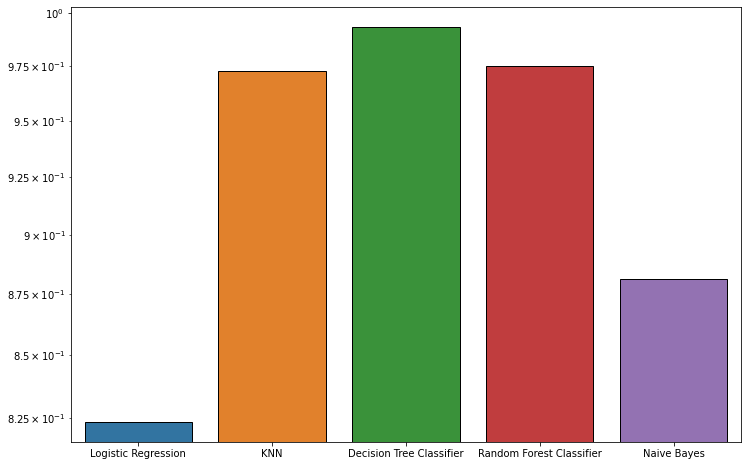

In [ ]:
models=['Logistic Regression','KNN','Decision Tree Classifier','Random Forest Classifier','Naive Bayes']
sb.barplot(x=models, y=[f1_LR,f1_KNN, f1_DT,f1_RF,f1_NB], log=True, ec="k")